In [1]:
%%html
<style>
div.input {
    display:none;
}
</style>

#run the above code to hide input code while presenting


 
## Threat Model
In the spirit of the Secure Software Development Lifecycle the threat modelling needs to be implemented early into the design of the application. This section needs to contain elaborated answers to the following questions below. Please write them as paragraphs with sections, rather than Q&A.
 
1. Attack Surface and Actors
   - Does this affect the attack surface of the application? What actors are relevant to this (external / internal)?
   - Are we opening any new ports? How are we accessing them? Are we providing any new endpoints?
   - Consider the actors that will be interacting with this feature: users, admins, and roles (non-human)
   - What roles and permissions are being introduced
2. Data Classification:
   - What data classification is handled by the application/control/change? The data classification can be:
   - Critical: This classification label applies to the most sensitive business information that is intended for use strictly within the organisation. Its unauthorised disclosure could seriously and adversely impact the business, its customers, its business partners, and its suppliers.
   - Confidential: This classification label applies to less-sensitive business information that is intended for use within the organisation. Its unauthorised disclosure could adversely impact the business or its customers, suppliers, business partners, or employees. Information that some people would consider to be private is included in this classification.
   - Operational: This classification label applies to essential operational data which is not classified as sensitive.
   - Public
3. Authentication and Authorisation:
   - What authentication and authorisation methods are used?
   - If passwords are used, then are we enforcing password complexity and length? MFA? Are we hardcoding admin or default passwords ? Where are we storing those secrets ?
4. Open Source Components:
   - What open source components will be used and are they maintained?
5. Encryption:
   - Is data secured at transit and rest?
6. Trust boundaries


   - Does this change the trust boundaries? Does the control/change  feature trust the inputs from the rest of the application and vice versa?
   - A trust boundary (in the context of threat modelling) is a location on the data flow diagram where data changes its level of trust. Any place where data is passed between two processes is typically a trust boundary. If your application reads a file from disk, there's a trust boundary between the application and the file because outside processes and users can modify the data in the file. If your application makes a call to a remote process, or a remote process makes calls to your application, that's a trust boundary. If you read data from a database, there's typically a trust boundary because other processes can modify the data in the database. Any place you accept user input in any form is always a trust boundary.
 
7. Assets:
   - Are any new assets introduced that need protection?
   - Assets are components in the application that we need to protect, hold value
 
9. Threats:
   - Write a few possible threats that could be introduced with this control/change and what would be their impact? How to mitigate those threats?

 
Once the questions are answered a threat modelling session should be organised and the threats finalised. The output should be documented into this section, and it contains:
 
- List of Threats
- Threat Actors
- Security Controls and Considerations
 
Any further iterations of the threat model can be created and added as a PR to the original one.
 
For further reading see
 
https://cheatsheetseries.owasp.org/cheatsheets/Threat_Modeling_Cheat_Sheet.html

## Data flow diagram 
In the data flow diagram it is important to represent the components of the Control/Change, the data flow between them and the trust boundaries.

In [2]:
from diagrams import Diagram, Edge, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.generic.database import SQL
from diagrams.aws.security import Cognito
from diagrams.onprem.client import Users, Client, User
from diagrams.aws.general import SamlToken

from diagrams.onprem.network import Internet
from diagrams.aws.compute import Lambda
from diagrams.aws.network import Route53, APIGateway, CF
from diagrams.aws.security import IAM, WAF
from diagrams.aws.storage import S3
from diagrams.aws.engagement import SES
from diagrams.aws.database import DDB
from diagrams.aws.management import Cloudwatch




In [3]:
graph_attr = {
    "fontsize": "30"
}

with Diagram("Example Website on Amazon S3 ",
             filename="diagram", show=False, graph_attr=graph_attr) as diag:

    users = Users()
    firewall = WAF("AWS WAF")
    route = Route53("Route53")

    with Cluster("AWS"):

        security = Cognito("Cognito")
        gateway = APIGateway("Gateway")
        db = DDB("DynamoDB")
        email_service = SES("SES")
        monitoring = Cloudwatch("AWS CloudWatch ")
        
        identity = IAM("AWS IAM")
        func_send_mail = Lambda("Send Email")
        func_store_data = Lambda("Store Data")
        functions = [func_send_mail, func_store_data]
        
        
        with Cluster("CDN"):
            cdn = S3("S3") >> CF("CloudFront CDN")

 
            

        functions >> Edge() << identity
        gateway >> Edge() << functions

        func_send_mail >> Edge() >> email_service >> users
        func_store_data - Edge() - db
       

        # Monitoring
        log_connection = Edge(color="darkgreen", style="dotted")
        monitoring >> log_connection << gateway
        monitoring >> log_connection << [func_send_mail, func_store_data]
        monitoring >> log_connection >> firewall

        cdn >> Edge() << gateway
        security >> Edge() << gateway

    Client() - Internet("www.yourcoolwebsite.com") >> Edge(color="darkblue", style="bold") << route
    route >> Edge() << firewall
    firewall >> Edge(color="darkblue", style="bold") >> gateway
    firewall >> Edge(color="darkblue", style="bold") >> cdn
    

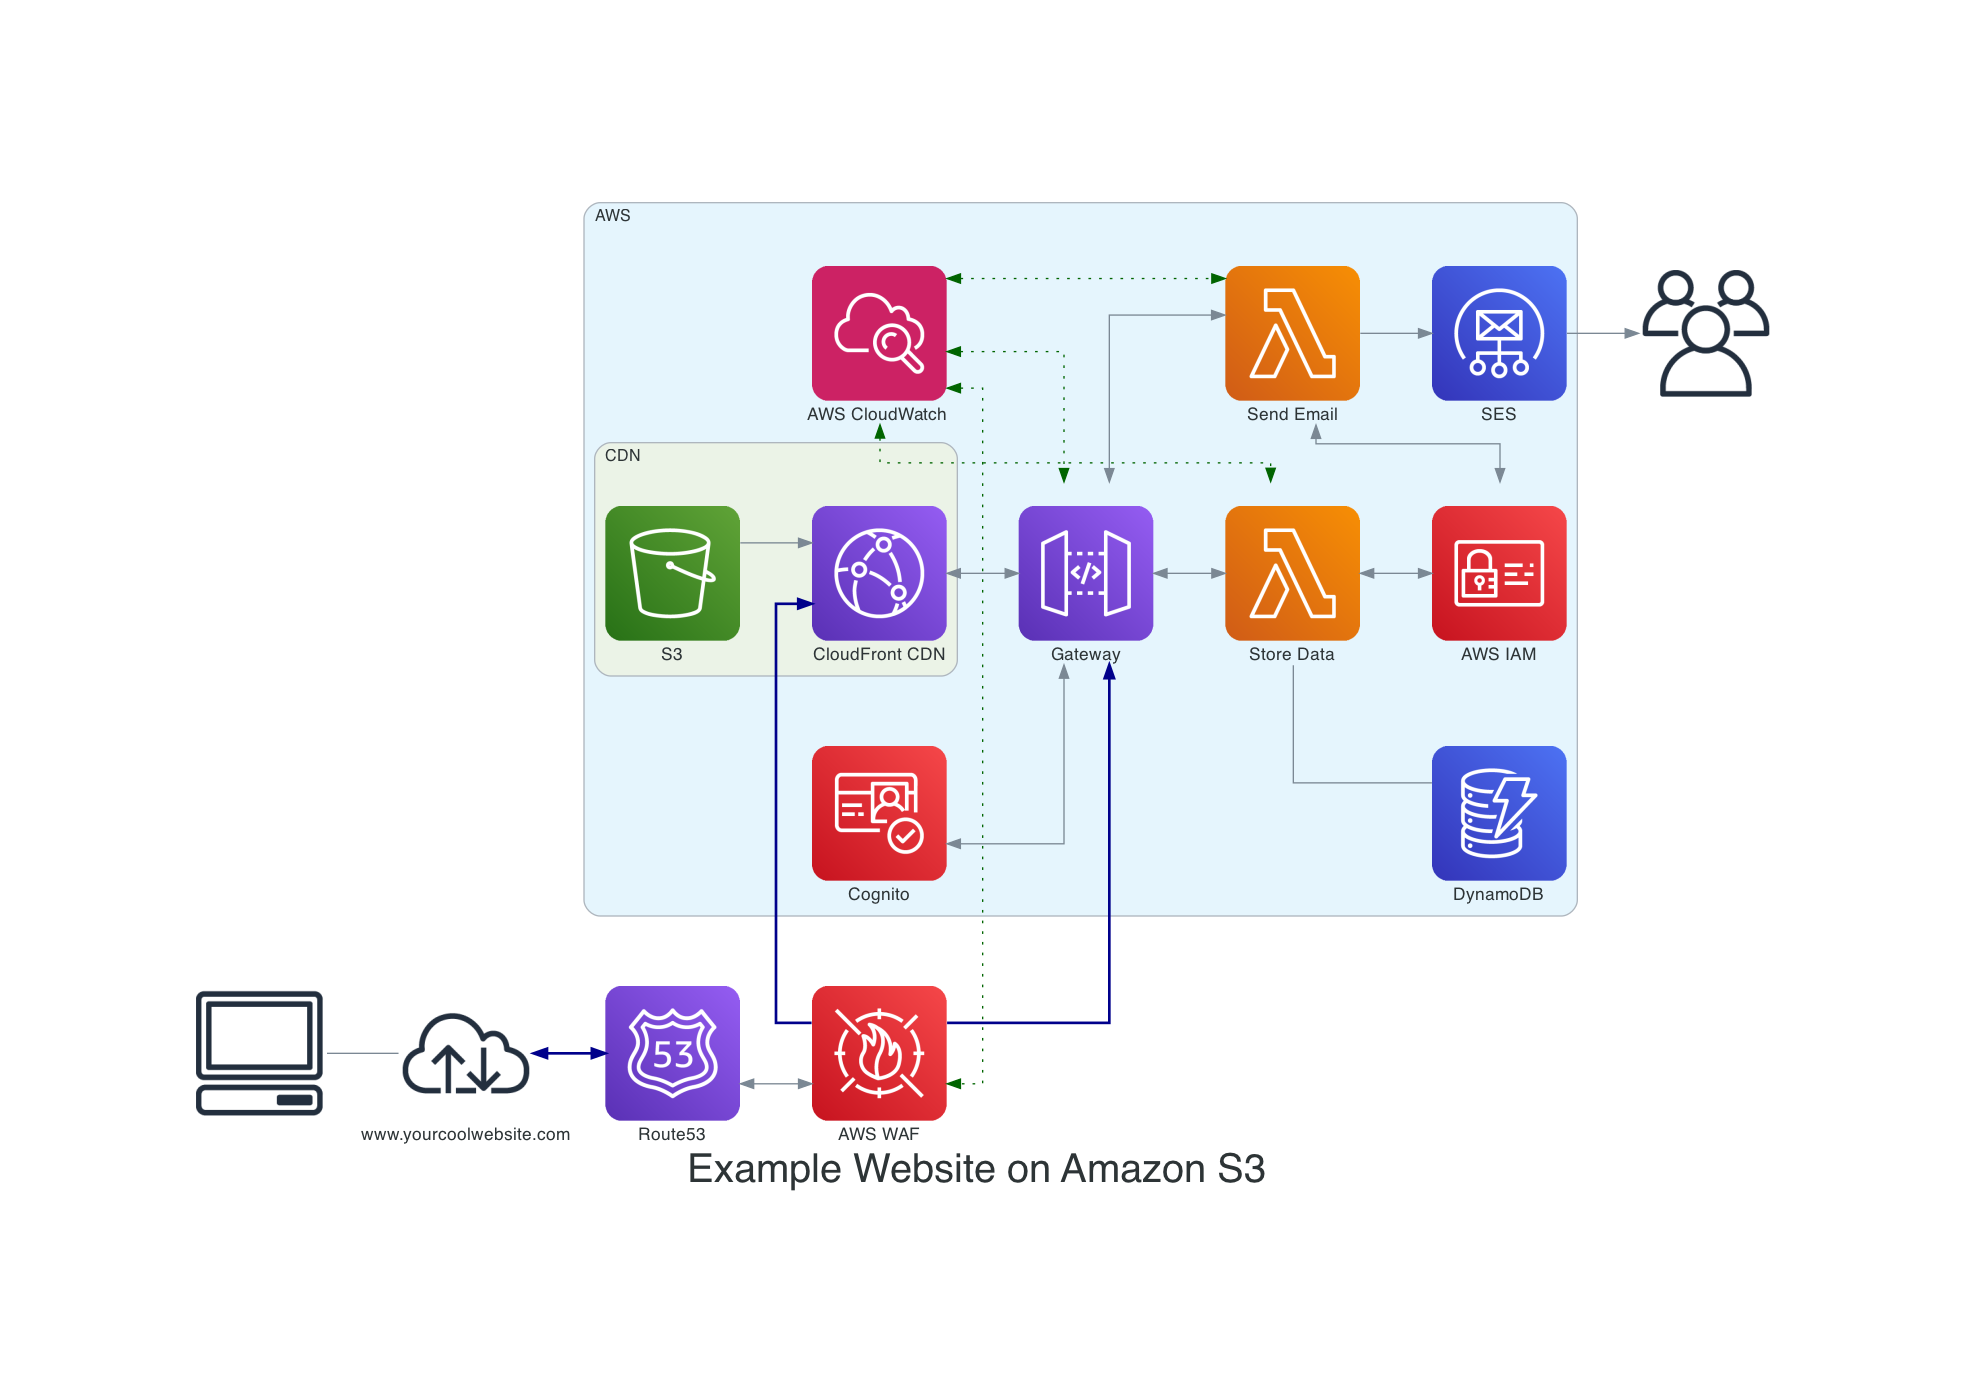

In [4]:
diag


In [5]:
#Wardley Maps - form a strategy for remediation by using Wardley Maps


%load_ext ipywardley

In [6]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

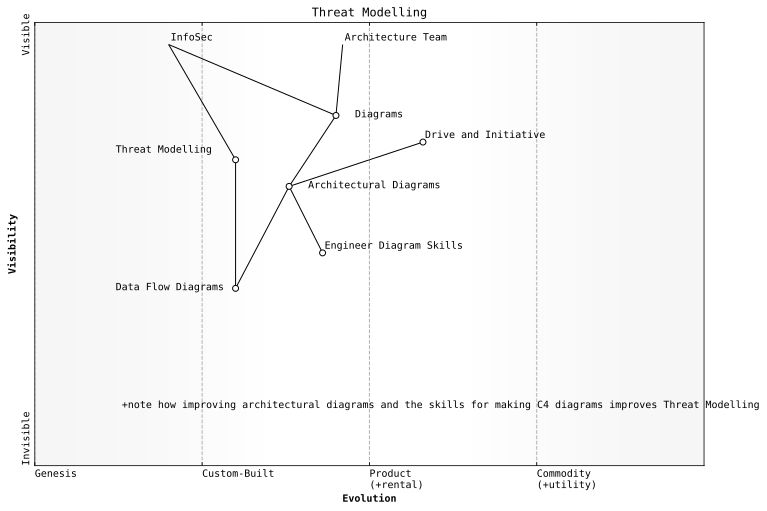

In [7]:






%%wardley test
title Threat Modelling 
anchor InfoSec [0.95, 0.2]
anchor Architecture Team [0.95, 0.46]
component Threat Modelling [0.69, 0.3] label [-120, 5]
component Data Flow Diagrams [0.4, 0.3] label [-120, -4]
component Diagrams [0.79, 0.45] label [19, -4]
component Architectural Diagrams [0.63, 0.38] label [19, -4]
component Engineer Diagram Skills [0.48, 0.43]
component Drive and Initiative [0.73, 0.58]
InfoSec -> Diagrams
InfoSec->Threat Modelling
Threat Modelling -> Data Flow Diagrams
Data Flow Diagrams -> Architectural Diagrams
Engineer Diagram Skills -> Architectural Diagrams
Drive and Initiative -> Architectural Diagrams

Architecture Team->Diagrams
Diagrams -> Architectural Diagrams


note +note how improving architectural diagrams and the skills for making C4 diagrams improves Threat Modelling [0.13, 0.13]

style wardley



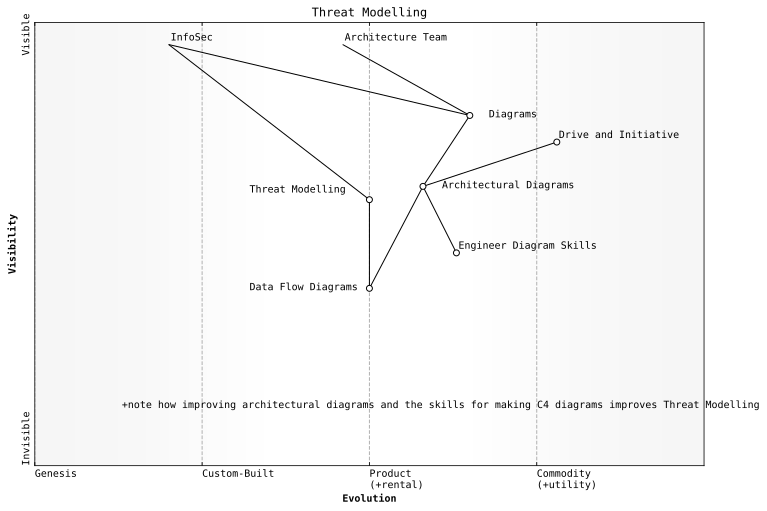

In [8]:
%%wardley test
title Threat Modelling 
anchor InfoSec [0.95, 0.2]
anchor Architecture Team [0.95, 0.46]
component Threat Modelling [0.6, 0.5] label [-120, 5]
component Data Flow Diagrams [0.4, 0.5] label [-120, -4]
component Diagrams [0.79, 0.65] label [19, -4]
component Architectural Diagrams [0.63, 0.58] label [19, -4]
component Engineer Diagram Skills [0.48, 0.63]
component Drive and Initiative [0.73, 0.78]
InfoSec -> Diagrams
InfoSec->Threat Modelling
Threat Modelling -> Data Flow Diagrams
Data Flow Diagrams -> Architectural Diagrams
Engineer Diagram Skills -> Architectural Diagrams
Drive and Initiative -> Architectural Diagrams

Architecture Team->Diagrams
Diagrams -> Architectural Diagrams


note +note how improving architectural diagrams and the skills for making C4 diagrams improves Threat Modelling [0.13, 0.13]

style wardley